In [74]:
#Import Section

In [75]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

2024-02-26 09:42:53.725027: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [76]:
# Keras SimpleRNN

In [77]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

2024-02-26 09:43:43.903932: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [78]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[0.12873435 1.2340516 ]]  wh =  [[ 0.37276495  0.9279258 ]
 [-0.9279258   0.3727649 ]]  bh =  [0. 0.]  wy = [[ 0.09166265]
 [-1.3843122 ]] by =  [0.]


In [79]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)
 
 
m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by
 
print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)
 
print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

1/1 [==============================] - 0s 197ms/step
h1 =  [[0.12873435 1.23405159]] h2 =  [[-0.83965198  3.0475702 ]] h3 =  [[-2.75470886  4.05904715]]
Prediction from network  [[-5.8714924]]
Prediction from our computation  [[-5.8714922]]


In [80]:
# Running the RNN on Sunspots Dataset

In [81]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [82]:
#  Reshaping Data for Keras

In [83]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [84]:
# Create RNN Model and Train

In [85]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.2877 - 666ms/epoch - 4ms/step
Epoch 2/20
187/187 - 0s - loss: 0.1012 - 257ms/epoch - 1ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0649 - 244ms/epoch - 1ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0484 - 250ms/epoch - 1ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0381 - 238ms/epoch - 1ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0318 - 227ms/epoch - 1ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0272 - 269ms/epoch - 1ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0238 - 264ms/epoch - 1ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0214 - 247ms/epoch - 1ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0191 - 264ms/epoch - 1ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0174 - 263ms/epoch - 1ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0160 - 264ms/epoch - 1ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0147 - 289ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0137 - 262ms/epoch - 1ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0127 - 265ms/epoch - 1ms/step
Epoch 16/20
187/187 - 0s - loss: 0

In [86]:
#  Compute and Print the Root Mean Square Error

In [87]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 1ms/step
Train RMSE: 0.095 RMSE
Test RMSE: 0.155 RMSE


In [88]:
# View the Result

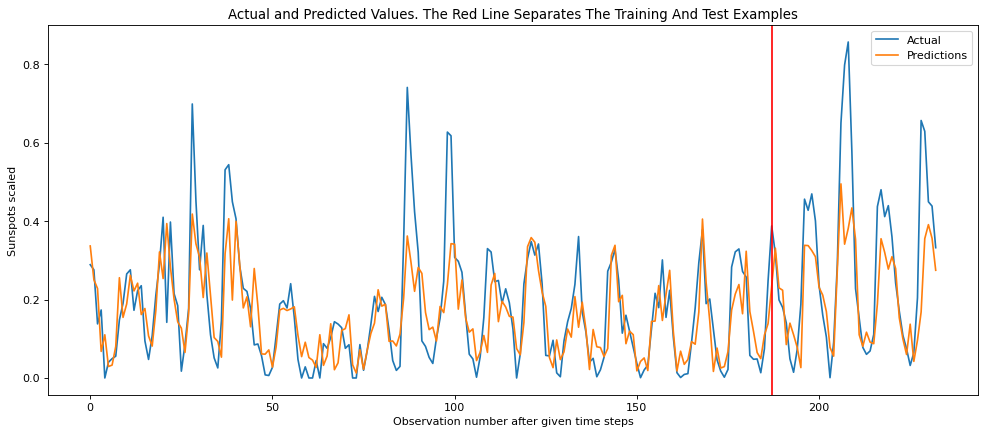

In [89]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)